In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
train_data = pd.read_csv('data/train.csv');
test_data = pd.read_csv('data/test.csv');
train_data.dropna(inplace=True)
train_data['question1'] = train_data['question1'].apply(str)
train_data['question2'] = train_data['question2'].apply(str)

C:\Users\nikit\AppData\Local\Temp\ipykernel_7736\1220079446.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv('data/test.csv');


In [3]:
from sentence_transformers.cross_encoder import CrossEncoder

In [5]:
model_distilroberta = CrossEncoder('cross-encoder/quora-distilroberta-base')

In [6]:
data = [(row['question1'], row['question2']) for _, row in train_data.iterrows()]

In [7]:
scores_d = model_distilroberta.predict(data[:10000])

In [8]:
scores_d_test = model_distilroberta.predict(data[10000:15000])

(array([[ 281.,   57.,   55.,   30.,   23.,   33.,   40.,   59.,  170.,
         2963.],
        [5753.,   76.,   36.,   29.,   27.,   18.,   21.,   34.,   57.,
          238.]]),
 array([2.3393298e-04, 1.0011386e-01, 1.9999379e-01, 2.9987371e-01,
        3.9975363e-01, 4.9963358e-01, 5.9951347e-01, 6.9939345e-01,
        7.9927337e-01, 8.9915329e-01, 9.9903321e-01], dtype=float32),
 <a list of 2 BarContainer objects>)

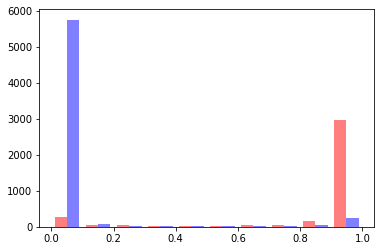

In [10]:
# quora-distilroberta-base
plt.hist([
    scores_d[np.where(train_data['is_duplicate'][:10000])[0]],
    scores_d[np.where(train_data['is_duplicate'][:10000] == False)[0]]
    ], color=['r','b'], alpha=0.5)

In [11]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

clf.fit(scores_d.reshape(-1,1), train_data['is_duplicate'][:10000])

LinearRegression()

In [12]:
pred = clf.predict(scores_d_test.reshape(-1, 1))

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [18]:
fpr1, tpr1, thresh1 = roc_curve(train_data['is_duplicate'][10000:15000], pred, pos_label=1)
print(roc_auc_score(train_data['is_duplicate'][10000:15000], pred))

0.9720323581560284


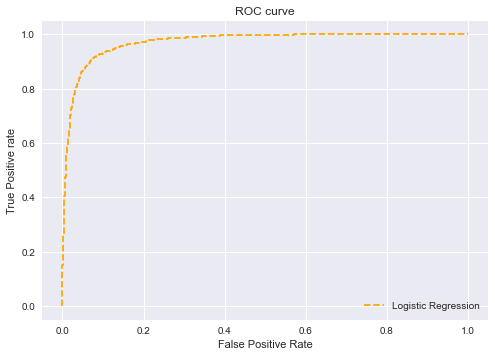

In [16]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr1, tpr1, linestyle='--',color='orang', label='Logistic Regression')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();